<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-к-моделированию" data-toc-modified-id="Подготовка-данных-к-моделированию-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных к моделированию</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span><ul class="toc-item"><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Выбор-модели-с-лучшим-значением-F1-меры" data-toc-modified-id="Выбор-модели-с-лучшим-значением-F1-меры-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выбор модели с лучшим значением F1-меры</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Отток клиентов

**Задача:**

Необходимо построить модель машинного обучения для спрогнозирования, уйдет ли клиент из банка или нет.

**Данные:**

Для работы имеются исторические данные о поведении клиентов и расторжении договоров с банком. 


## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Churn.csv')

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Описание данных:

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата
- `Exited` — факт ухода клиента (*целевой признак*)

Проверка на наличие дубликатов.

In [5]:
data.duplicated().sum()

0

Переименование столбцов для более читаемого отображения. 

In [6]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'creditscore':'credit_score',
                            'numofproducts':'num_of_products',
                            'hascrcard':'has_cr_card',
                            'isactivemember':'is_active_member',
                            'estimatedsalary':'estimated_salary'})

Поиск и замена пустых значений в столбце `tenure`.

Природа появления пропусков в столбце неизвестна. Можно было бы предположить, что пропуски означают, что клиенты новые и менее года пользуются услугами банка. Но в столбце присутствуют значения равным 0. Возможно, причиной пропусков является сбой. Так же нет никаких связанных с этим столбцов данных, что помогли бы заполнить пропуски. 

In [7]:
data[data['tenure'].isna() == True]

,rownumber,customerid,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [8]:
data = data[data['tenure'].isna() == False]

Изменение типов данных  в столбце `tenure`.

In [9]:
data['tenure'] = data['tenure'].astype('Int64')

**Вывод:**

В целом предоставленные данные выглядят хорошо, за исключением пропусков в одном столбце. Но в дальнейшей работе с данными нам понадабятся не все столбцы:

- `RowNumber` - повторяет информацию датафрейма и не несет ценности для обучения модели. Поэтому столбец необходимо удалить;
- `CustomerId` - является идентификатором пользователя и может только помешать обучению модели;
- `Surname` - фамилии пользователей, которые тоже не помогут построению модели, а даже наоборот помешают;

`Geography` и `Gender` необходимо закодировать закодировать прямым кодированием (*OHE*), чтобы преобразовать категориальные признаки значений столбцов в численные признки.

## Исследование задачи

### Подготовка данных к моделированию

Избавляемся от ненужных столбцов датафрейма.

In [10]:
data = data.drop(['rownumber', 'surname', 'customerid'], axis=1)

### Разделение на выборки

Спрятанной тестовой выборки нет. Разобъем данные на три части: обучающая, валидационная и тестовая. Размеры тестового и валидационного наборов равны. Исходные данные разбиваем в соотношении 3:1:1.

In [13]:
target = data['exited']
features = data.drop(['exited'] , axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

Размер обучаемой выборки:

In [14]:
print(features_train.shape)
print(target_train.shape)

(5454, 10)
(5454,)


Разделение на валидационную и тестовую выборки.

In [15]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345) 

Размер валидационной выборки:

In [16]:
print(features_valid.shape)
print(target_valid.shape)

(1818, 10)
(1818,)


Размер тестовой выборки:

In [17]:
print(features_test.shape)
print(target_test.shape)

(1819, 10)
(1819,)


Кодирование признаков для дальнейшего моделирования.

In [18]:
geo = features_train[['geography']]
gender = features_train[['gender']]

In [19]:
def ohe_func(selection):
    ohe = OneHotEncoder(drop='first')
    geo = features_train[['geography']]
    gender = features_train[['gender']]
    
    ohe = ohe.fit(geo)
    selection_ohe_geo = ohe.transform(selection[['geography']]).toarray()
    selection_ohe_geo = pd.DataFrame(selection_ohe_geo).set_index(selection.index)
    selection_ohe_geo = selection_ohe_geo.rename(columns={0:'geo_g', 1:'geo_s'})
    selection_new = selection.join(selection_ohe_geo).drop('geography', axis=1)
    
    ohe = ohe.fit(gender)
    selection_ohe_gender = ohe.fit_transform(selection[['gender']]).toarray()
    selection_ohe_gender = pd.DataFrame(selection_ohe_gender).set_index(selection.index)
    selection_ohe_gender = selection_ohe_gender.rename(columns={0:'gender_m'})
    selection_new = selection_new.join(selection_ohe_gender).drop('gender', axis=1)
    
    return selection_new

In [20]:
features_train = ohe_func(features_train)
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geo_g,geo_s,gender_m
9344,727,28,2,110997.76,1,1,0,101433.76,0.0,0.0,0.0
3796,537,26,7,106397.75,1,0,0,103563.23,0.0,0.0,1.0
7462,610,40,9,0.00,1,1,1,149602.54,0.0,0.0,1.0
1508,576,36,6,0.00,2,1,1,48314.00,0.0,0.0,1.0
4478,549,31,4,0.00,2,0,1,25684.85,0.0,0.0,1.0


In [21]:
features_valid = ohe_func(features_valid)
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geo_g,geo_s,gender_m
7445,516,45,4,0.00,1,1,0,95273.73,0.0,0.0,0.0
8620,768,40,8,0.00,2,0,1,69080.46,0.0,0.0,0.0
1714,730,45,6,152880.97,1,0,0,162478.11,1.0,0.0,1.0
5441,751,29,1,135536.50,1,1,0,66825.33,0.0,0.0,1.0
9001,688,32,6,124179.30,1,1,1,138759.15,0.0,1.0,1.0


In [22]:
features_test = ohe_func(features_test)
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geo_g,geo_s,gender_m
5170,814,31,4,0.00,2,1,1,142029.17,0.0,0.0,0.0
4180,607,36,10,106702.94,2,0,0,198313.69,1.0,0.0,1.0
7349,632,42,6,59972.26,2,0,1,148172.94,1.0,0.0,1.0
7469,686,35,8,105419.73,1,1,0,35356.46,0.0,0.0,0.0
3467,538,42,1,98548.62,2,0,1,94047.75,1.0,0.0,0.0


### Масштабирование признаков

Проведем масштабирование признаков, так как в разных столбцах находитятся значения с разными разбросами.

In [23]:
numeric = ['credit_score','age','balance','estimated_salary', 'tenure', 'num_of_products']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [24]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geo_g,geo_s,gender_m
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0.0,0.0,0.0
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0.0,0.0,1.0
7462,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848738,0.0,0.0,1.0
1508,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,0.0,0.0,1.0
4478,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,0.0,0.0,1.0


In [25]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geo_g,geo_s,gender_m
7445,-1.369326,0.560665,-0.336987,-1.237830,-0.908179,1,0,-0.086537,0.0,0.0,0.0
8620,1.232367,0.090079,1.041028,-1.237830,0.809300,0,1,-0.537457,0.0,0.0,0.0
1714,0.840048,0.560665,0.352020,1.231363,-0.908179,0,0,1.070393,1.0,0.0,1.0
5441,1.056856,-0.945210,-1.370498,0.951231,-0.908179,1,0,-0.576279,0.0,0.0,1.0
9001,0.406433,-0.662858,0.352020,0.767800,-0.908179,1,1,0.662068,0.0,1.0,1.0


In [26]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geo_g,geo_s,gender_m
5170,1.707279,-0.756975,-0.336987,-1.237830,0.809300,1,1,0.718362,0.0,0.0,0.0
4180,-0.429826,-0.286389,1.730036,0.485538,0.809300,0,0,1.687305,1.0,0.0,1.0
7349,-0.171721,0.278313,0.352020,-0.269213,0.809300,0,1,0.824128,1.0,0.0,1.0
7469,0.385784,-0.380507,1.041028,0.464813,-0.908179,1,0,-1.118018,0.0,0.0,0.0
3467,-1.142194,0.278313,-1.370498,0.353837,0.809300,0,1,-0.107642,1.0,0.0,0.0


### Проверка моделей на адекватность

Проверка качества моделей до борьбы с дисбалансом классов.

#### Модель дерева решений

In [27]:
best_depth = 0
best_features = 0        
best_samples_leaf = 0
best_samples_split = 0
best_result = 0

for depth in range(1,30):
    for features in range(1,10):
        for samples_leaf in range(1,10):
            for samples_split in range(2,16,2):
                model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth,
                                                   max_features=features, min_samples_leaf=samples_leaf,
                                                   min_samples_split=samples_split)
                model_dtc.fit(features_train, target_train)
                dtc_prediction = model_dtc.predict(features_valid)
                result = f1_score(target_valid, dtc_prediction)
                if result > best_result:
                    best_result = result
                    best_depth = depth
                    best_features = features      
                    best_samples_leaf = samples_leaf
                    best_samples_split = samples_split
                    
print(f'Лучшие гиперпараметры:\n\
      max_depth: {best_depth}\n\
      max_features:{best_features}\n\
      min_samples_leaf:{best_samples_leaf}\n\
      min_samples_split:{best_samples_split}')

Лучшие гиперпараметры:
      max_depth: 11
      max_features:5
      min_samples_leaf:7
      min_samples_split:2


In [28]:
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=8,
                                                   max_features=6, min_samples_leaf=2,
                                                   min_samples_split=12)
model_dtc.fit(features_train, target_train)
dtc_prediction = model_dtc.predict(features_valid)

print('Точность:', precision_score(target_valid, dtc_prediction))
print('Полнота:', recall_score(target_valid, dtc_prediction))
print('F1:', f1_score(target_valid, dtc_prediction))
confusion_matrix(target_valid, dtc_prediction)

Точность: 0.7293577981651376
Полнота: 0.4217506631299735
F1: 0.534453781512605


array([[1382,   59],
       [ 218,  159]])

In [29]:
dtc_probabilities_one_valid = model_dtc.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, dtc_probabilities_one_valid))

0.8322930031274333


**Вывод:**

Матрица ошибок модели дерева решений показывает, что модель выдает большое количество истинно отрицательных предсказаний, но в тоже время ложноотрицательных немного больше, чем истинно положительных. Полнота находятся на достаточно низком уровне, из-за чего значение F1 метрики тоже низкое.

#### Модель случайного леса

In [30]:
best_depth = 0
best_est = 0
best_features = 0        
best_samples_leaf = 0
best_samples_split = 0
best_result = 0

for depth in range(10,21):
    for est in range(10,21,10):
        for features in range(1,5):
            for samples_leaf in range(1,3):
                for samples_split in range(2,6,2):
                    model_rfc = RandomForestClassifier(random_state=12345, max_depth=depth,
                                                       n_estimators=est, max_features=features,
                                                       min_samples_leaf=samples_leaf,
                                                       min_samples_split=samples_split)
                    model_rfc.fit(features_train, target_train)
                    rfc_prediction = model_rfc.predict(features_valid)
                    result = f1_score(target_valid, rfc_prediction)
                    if result > best_result:
                        best_result = result
                        best_depth = depth
                        best_est = est
                        best_features = features      
                        best_samples_leaf = samples_leaf
                        best_samples_split = samples_split
                        
print(f'Лучшие гиперпараметры:\n\
      max_depth: {best_depth}\n\
      n_estimators: {best_est}\n\
      max_features:{best_features}\n\
      min_samples_leaf:{best_samples_leaf}\n\
      min_samples_split:{best_samples_split}')

Лучшие гиперпараметры:
      max_depth: 20
      n_estimators: 10
      max_features:3
      min_samples_leaf:1
      min_samples_split:4


In [31]:
model_rtc = RandomForestClassifier(random_state=12345, max_depth=15,
                                   n_estimators=20, max_features=4,
                                   min_samples_leaf=2,
                                   min_samples_split=2)
model_rfc.fit(features_train, target_train)
rfc_prediction = model_rfc.predict(features_valid)

print('Точность:', precision_score(target_valid, rfc_prediction))
print('Полнота:', recall_score(target_valid, rfc_prediction))
print('F1:', f1_score(target_valid, rfc_prediction))
confusion_matrix(target_valid, rfc_prediction)

Точность: 0.759656652360515
Полнота: 0.46949602122015915
F1: 0.580327868852459


array([[1385,   56],
       [ 200,  177]])

In [32]:
rfc_probabilities_one_valid = model_rfc.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, rfc_probabilities_one_valid))

0.8538003191859471


**Вывод:**

Модель случайного леса немного лучше дерева решений. Ложноотрицательных ответов все равно больше, чем истинно положительных. Точность более высокая, но из-за значения полноты значение F1 так же низкое.

#### Модель логистической регрессии

In [33]:
best_iter = 0
best_result = 0

for iterr in range(10,100,10):
    model_lr = LogisticRegression(random_state=12345, max_iter=iterr)
    model_lr.fit(features_train, target_train)
    lr_prediction = model_lr.predict(features_valid)
    result = f1_score(target_valid, lr_prediction)
    if result > best_result:
        best_iter = iterr
        best_result = result
        
print(f'Лучшие гиперпараметры: max_iter: {best_iter}')

Лучшие гиперпараметры: max_iter: 10


In [34]:
model_lr = LogisticRegression(random_state=12345, max_iter=20)
model_lr.fit(features_train, target_train)
lr_prediction = model_lr.predict(features_valid)

print('Точность:', precision_score(target_valid, lr_prediction))
print('Полнота:', recall_score(target_valid, lr_prediction))
print('F1:', f1_score(target_valid, lr_prediction))
confusion_matrix(target_valid, lr_prediction)

Точность: 0.6178861788617886
Полнота: 0.20159151193633953
F1: 0.30400000000000005


array([[1394,   47],
       [ 301,   76]])

In [35]:
lr_probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, lr_probabilities_one_valid))

0.773663293800172


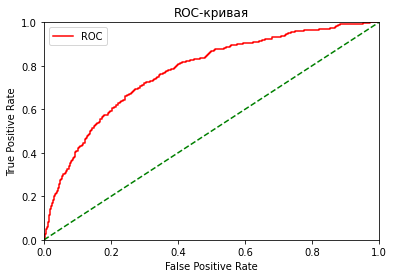

In [36]:
fper, tper, thresholds = roc_curve(target_valid, lr_probabilities_one_valid)
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

**Вывод:**

В модели логистической регрессии преобладают отрицательные предсказания, при таком повышается точность, но падает полнота и за ней значение F1.

## Борьба с дисбалансом

In [37]:
target_train.value_counts(normalize = 1)

0    0.793546
1    0.206454
Name: exited, dtype: float64

Очевидно у классов наблюдается дисбаланс (~80% отрицательных и ~20% положительных).

Для достижения баланса классов нам необходмо увеличить количество положительных ответов в 4 раза, либо же уменьшить колличество отрицательных ответов.

Проверим 2 техники изменения выборки для балансов классов.

### Увеличение выборки

Преобразование будет проходит в несколько этапов:
- Разделить обучающую выборку на отрицательные и положительные объекты;
- Скопировать несколько раз положительные объекты;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [38]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [39]:
features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, 4)

In [40]:
target_upsampled_train.value_counts(normalize = 1)

1    0.509964
0    0.490036
Name: exited, dtype: float64

**Вывод:**

Благодаря увеличению положительных объектов, выборка сбалансировалась и положительных объектов стало даже больше, чем отрицательных, но балансировка выглядит достаточно четкой, для продолжения исследования.

### Уменьшение выборки

Преобразование будет проходит в несколько этапов:
- Разделить обучающую выборку на отрицательные и положительные объекты;
- Случайным образом отбросить часть из отрицательных объектов;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [41]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [42]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.2)

In [43]:
target_downsampled_train.value_counts(normalize = 1)

1    0.565261
0    0.434739
Name: exited, dtype: float64

**Вывод:**

Уменьшение отрицательных значении привело к небольшому главенству положительных значений, и сравнивая метрики, более удачно подойдет увеличение выборки. Проверим методы борьбы с дисбалансом с помощью выбора модели с лучшим значение F1-меры.

### Выбор модели с лучшим значением F1-меры

Сбалансировав обучающие данные увеличив или уменьшив выборку посмотрим, насколько увеличились значения моделей и выберем лучшую модель с предельно большим значением F1-меры.

**Модель дерева решений**

С увеличением выборки

In [44]:
best_depth = 0
best_features = 0        
best_samples_leaf = 0
best_samples_split = 0
best_result = 0

for depth in range(1,30):
    for features in range(1,10):
        for samples_leaf in range(1,10):
            for samples_split in range(2,20,2):
                model_dtc_upsampled = DecisionTreeClassifier(random_state=12345, max_depth=depth,
                                                             max_features=features, min_samples_leaf=samples_leaf,
                                                             min_samples_split=samples_split)
                model_dtc_upsampled.fit(features_upsampled_train, target_upsampled_train)
                dtc_prediction_upsampled = model_dtc_upsampled.predict(features_valid)
                result = f1_score(target_valid, dtc_prediction_upsampled)
                if result > best_result:
                    best_depth = depth
                    best_features = features      
                    best_samples_leaf = samples_leaf
                    best_samples_split = samples_split
                    best_result = result
                    
print(f'Лучшие гиперпараметры:\n\
      max_depth: {best_depth}\n\
      max_features:{best_features}\n\
      min_samples_leaf:{best_samples_leaf}\n\
      min_samples_split:{best_samples_split}')

Лучшие гиперпараметры:
      max_depth: 6
      max_features:6
      min_samples_leaf:8
      min_samples_split:2


In [45]:
model_dtc_upsampled = DecisionTreeClassifier(random_state=12345, max_depth=7,
                                             max_features=4, min_samples_leaf=4,
                                             min_samples_split=18)
model_dtc_upsampled.fit(features_upsampled_train, target_upsampled_train)
dtc_prediction_upsampled = model_dtc_upsampled.predict(features_valid)

print('Точность:', precision_score(target_valid, dtc_prediction_upsampled))
print('Полнота:', recall_score(target_valid, dtc_prediction_upsampled))
print('F1:', f1_score(target_valid, dtc_prediction_upsampled))

Точность: 0.40720961281708945
Полнота: 0.8090185676392573
F1: 0.541740674955595


In [46]:
dtc_probabilities_one_valid_upsampled = model_dtc_upsampled.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, dtc_probabilities_one_valid_upsampled))

0.8229926167541328


С уменьшением выборки

In [47]:
best_depth = 0
best_features = 0        
best_samples_leaf = 0
best_samples_split = 0
best_result = 0

for depth in range(1,30):
    for features in range(1,10):
        for samples_leaf in range(1,10):
            for samples_split in range(2,20,2):
                model_dtc_downsampled = DecisionTreeClassifier(random_state=12345, max_depth=depth,
                                                               max_features=features, min_samples_leaf=samples_leaf,
                                                               min_samples_split=samples_split)
                model_dtc_downsampled.fit(features_downsampled_train, target_downsampled_train)
                dtc_prediction_downsampled = model_dtc_downsampled.predict(features_valid)
                result = f1_score(target_valid, dtc_prediction_downsampled)
                if result > best_result:
                    best_depth = depth
                    best_features = features      
                    best_samples_leaf = samples_leaf
                    best_samples_split = samples_split
                    best_result = result
                    
print(f'Лучшие гиперпараметры:\n\
      max_depth: {best_depth}\n\
      max_features:{best_features}\n\
      min_samples_leaf:{best_samples_leaf}\n\
      min_samples_split:{best_samples_split}')

Лучшие гиперпараметры:
      max_depth: 5
      max_features:8
      min_samples_leaf:7
      min_samples_split:2


In [48]:
model_dtc_downsampled = DecisionTreeClassifier(random_state=12345, max_depth=7,
                                               max_features=6, min_samples_leaf=1,
                                               min_samples_split=12)
model_dtc_downsampled.fit(features_downsampled_train, target_downsampled_train)
dtc_prediction_downsampled = model_dtc_downsampled.predict(features_valid)

print('Точность:', precision_score(target_valid, dtc_prediction_downsampled))
print('Полнота:', recall_score(target_valid, dtc_prediction_downsampled))
print('F1:', f1_score(target_valid, dtc_prediction_downsampled))

Точность: 0.4046692607003891
Полнота: 0.8275862068965517
F1: 0.5435540069686411


In [49]:
dtc_probabilities_one_valid_downsampled = model_dtc_downsampled.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, dtc_probabilities_one_valid_downsampled))

0.8244578532812279


**Модель случайного леса**

С увеличением выборки

In [50]:
best_depth = 0
best_est = 0
best_features = 0        
best_samples_leaf = 0
best_samples_split = 0
best_result = 0

for depth in range(40,51):
    for est in range(40,60,10):
        for features in range(1,4):
            for samples_leaf in range(1,4):
                for samples_split in range(10,16,2):
                    model_rfc_upsampled = RandomForestClassifier(random_state=12345, max_depth=depth,
                                                                 n_estimators=est, max_features=features,
                                                                 min_samples_leaf=samples_leaf,
                                                                 min_samples_split=samples_split)
                    model_rfc_upsampled.fit(features_upsampled_train, target_upsampled_train)
                    rfc_prediction_upsampled = model_rfc_upsampled.predict(features_valid)
                    result = f1_score(target_valid, rfc_prediction_upsampled)
                    if result > best_result:
                        best_result = result
                        best_depth = depth
                        best_est = est
                        best_features = features      
                        best_samples_leaf = samples_leaf
                        best_samples_split = samples_split
                        
print(f'Лучшие гиперпараметры:\n\
      max_depth: {best_depth}\n\
      n_estimators: {best_est}\n\
      max_features:{best_features}\n\
      min_samples_leaf:{best_samples_leaf}\n\
      min_samples_split:{best_samples_split}')

Лучшие гиперпараметры:
      max_depth: 40
      n_estimators: 40
      max_features:2
      min_samples_leaf:2
      min_samples_split:14


In [51]:
model_rfc_upsampled = RandomForestClassifier(random_state=12345, max_depth=40,
                                             n_estimators=50, max_features=3,
                                             min_samples_leaf=3,
                                             min_samples_split=14)
model_rfc_upsampled.fit(features_upsampled_train, target_upsampled_train)
rfc_prediction_upsampled = model_rfc_upsampled.predict(features_valid)

print('Точность:', precision_score(target_valid, rfc_prediction_upsampled))
print('Полнота:', recall_score(target_valid, rfc_prediction_upsampled))
print('F1:', f1_score(target_valid, rfc_prediction_upsampled))

Точность: 0.5971563981042654
Полнота: 0.6684350132625995
F1: 0.6307884856070087


In [52]:
rfc_probabilities_one_valid_upsampled = model_rfc_upsampled.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, rfc_probabilities_one_valid_upsampled))

0.8649221270963834


С уменьшением выборки

In [53]:
best_depth = 0
best_est = 0
best_features = 0        
best_samples_leaf = 0
best_samples_split = 0
best_result = 0

for depth in range(30,40):
    for est in range(50,70,10):
        for features in range(1,4):
            for samples_leaf in range(1,5):
                for samples_split in range(6,12,2):
                    model_rfc_downsampled = RandomForestClassifier(random_state=12345, max_depth=depth,
                                                                   n_estimators=est, max_features=features,
                                                                   min_samples_leaf=samples_leaf,
                                                                   min_samples_split=samples_split)
                    model_rfc_downsampled.fit(features_downsampled_train, target_downsampled_train)
                    rfc_prediction_downsampled = model_rfc_downsampled.predict(features_valid)
                    result = f1_score(target_valid, rfc_prediction_downsampled)
                    if result > best_result:
                        best_result = result
                        best_depth = depth
                        best_est = est
                        best_features = features      
                        best_samples_leaf = samples_leaf
                        best_samples_split = samples_split
                        
print(f'Лучшие гиперпараметры:\n\
      max_depth: {best_depth}\n\
      n_estimators: {best_est}\n\
      max_features:{best_features}\n\
      min_samples_leaf:{best_samples_leaf}\n\
      min_samples_split:{best_samples_split}')

Лучшие гиперпараметры:
      max_depth: 30
      n_estimators: 60
      max_features:3
      min_samples_leaf:1
      min_samples_split:10


In [54]:
model_rfc_downsampled = RandomForestClassifier(random_state=12345, max_depth=30,
                                               n_estimators=60, max_features=3,
                                               min_samples_leaf=4,
                                               min_samples_split=10)
model_rfc_downsampled.fit(features_downsampled_train, target_downsampled_train)
rfc_prediction_downsampled = model_rfc_downsampled.predict(features_valid)

print('Точность:', precision_score(target_valid, rfc_prediction_downsampled))
print('Полнота:', recall_score(target_valid, rfc_prediction_downsampled))
print('F1:', f1_score(target_valid, rfc_prediction_downsampled))

Точность: 0.41365979381443296
Полнота: 0.8514588859416445
F1: 0.5568083261058109


In [55]:
rfc_probabilities_one_valid_downsampled = model_rfc_downsampled.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, rfc_probabilities_one_valid_downsampled))

0.8630390404541496


**Модель логистической регрессии**

С увеличением выборки

In [56]:
best_iter = 0
best_result = 0

for iterr in range(10,100,10):
    model_lr_upsampled = LogisticRegression(random_state=12345, max_iter=iterr)
    model_lr_upsampled.fit(features_upsampled_train, target_upsampled_train)
    lr_prediction_upsampled = model_lr_upsampled.predict(features_valid)
    result = f1_score(target_valid, lr_prediction_upsampled)
    if result > best_result:
        best_iter = iterr
        best_result = result
        
print(f'Лучшие гиперпараметры: max_iter: {best_iter}')

Лучшие гиперпараметры: max_iter: 10


In [57]:
model_lr_upsampled = LogisticRegression(random_state=12345, max_iter=30)
model_lr_upsampled.fit(features_upsampled_train, target_upsampled_train)
lr_prediction_upsampled = model_lr_upsampled.predict(features_valid)

print('Точность:', precision_score(target_valid, lr_prediction_upsampled))
print('Полнота:', recall_score(target_valid, lr_prediction_upsampled))
print('F1:', f1_score(target_valid, lr_prediction_upsampled))

Точность: 0.385989010989011
Полнота: 0.7453580901856764
F1: 0.5085972850678734


In [58]:
lr_probabilities_one_valid_upsampled = model_lr_upsampled.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, lr_probabilities_one_valid_upsampled))

0.777854680197402


С уменьшением выборки

In [59]:
best_iter = 0
best_result = 0

for iterr in range(10,100,10):
    model_lr_downsampled = LogisticRegression(random_state=12345, max_iter=iterr)
    model_lr_downsampled.fit(features_downsampled_train, target_downsampled_train)
    lr_prediction_downsampled = model_lr_downsampled.predict(features_valid)
    result = f1_score(target_valid, lr_prediction_downsampled)
    if result > best_result:
        best_iter = iterr
        best_result = result
        
print(f'Лучшие гиперпараметры: max_iter: {best_iter}')

Лучшие гиперпараметры: max_iter: 10


In [60]:
model_lr_downsampled = LogisticRegression(random_state=12345, max_iter=20)
model_lr_downsampled.fit(features_downsampled_train, target_downsampled_train)
lr_prediction_downsampled = model_lr_downsampled.predict(features_valid)

print('Точность:', precision_score(target_valid, lr_prediction_downsampled))
print('Полнота:', recall_score(target_valid, lr_prediction_downsampled))
print('F1:', f1_score(target_valid, lr_prediction_downsampled))

Точность: 0.35017221584385766
Полнота: 0.8090185676392573
F1: 0.48878205128205127


In [61]:
lr_probabilities_one_valid_downsampled = model_lr_downsampled.predict_proba(features_valid)[:, 1]
print(roc_auc_score(target_valid, lr_probabilities_one_valid_downsampled))

0.7786167504514439


**Вывод:**

Показатели всех моделей улучшились.

Лучшие результаты показывает модель случайного леса. На валидационной выборке модель случайного леса уже показывает результаты F1 меры = 0.6307884856070087, что выше целевого значения.

## Тестирование модели

После борьбы с дисбалансом была найдена лучшая модель для проведения теста модели для получения наибольшего значения F1-метрики.

In [62]:
model_rfc_best = RandomForestClassifier(random_state=12345, max_depth=40,
                                        n_estimators=40, max_features=2,
                                        min_samples_leaf=2, min_samples_split=14)
model_rfc_best.fit(features_upsampled_train, target_upsampled_train)
rfc_prediction_best = model_rfc_best.predict(features_test) 
print('F1:', f1_score(target_test, rfc_prediction_best))

rfc_probabilities_one_valid_best = model_rfc_best.predict_proba(features_valid)[:, 1]
print('AUC-ROC:',roc_auc_score(target_valid, rfc_probabilities_one_valid_best))

F1: 0.6
AUC-ROC: 0.8642760240549132


## Общий вывод

Было проведено исследование на выявление и постороения лучшей модели машинного обучения для прогнозирования ухода клиентов из банка. Были предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Для создания и исследования были подготовленны данные, производилась начальная проверка, которая вывела дисбаланс классов **(~80% отрицательных и ~20% положительных ответов)**.

Проведены операции по балансу данных. Для более удачного баланса был выбран метод **увеличения выборки**.

После балансировки ответов метрики некоторых моделей стали лучше, и в качестве лучшей модели для прогнозирования была выбрана модель случайного леса (`Random Forest Classifier`).

После подбора гиперпараметров для модели на тестовых данных удалость достичь метрику F1 в значении 0.6, и AUC-ROC в значении 0.8642760240549132.